iteration 0 | cost 657.362540
iteration 100 | cost 252.398686
iteration 200 | cost 246.649480
iteration 300 | cost 241.058841
iteration 400 | cost 235.622395
iteration 500 | cost 230.335891
iteration 600 | cost 225.195192
iteration 700 | cost 220.196276
iteration 800 | cost 215.335234
iteration 900 | cost 210.608263
iteration 1000 | cost 206.011665
iteration 1100 | cost 201.541844
iteration 1200 | cost 197.195304
iteration 1300 | cost 192.968645
iteration 1400 | cost 188.858559
iteration 1500 | cost 184.861832
iteration 1600 | cost 180.975338
iteration 1700 | cost 177.196036
iteration 1800 | cost 173.520970
iteration 1900 | cost 169.947264
iteration 2000 | cost 166.472124
iteration 2100 | cost 163.092830
iteration 2200 | cost 159.806739
iteration 2300 | cost 156.611281
iteration 2400 | cost 153.503956
iteration 2500 | cost 150.482333
iteration 2600 | cost 147.544049
iteration 2700 | cost 144.686804
iteration 2800 | cost 141.908364
iteration 2900 | cost 139.206555
iteration 3000 | cost 

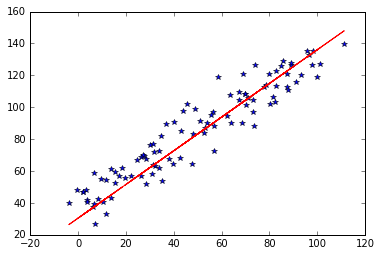

In [107]:
# Example from http://stackoverflow.com/questions/17784587/gradient-descent-using-python-and-numpy
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

def gradientDescent(x, y, alpha, numIter):
    '''
    
    Parameters
    ----------
    
    x: m by n numpy feature matrix, one row per sample
    y: m by 1 numpy response variable column vector, one row per sample
    theta: n by 1 feature weights
    alpha: learning rate
    numIter: max number of iterations to run
    
    '''
    # m is the number of samples.
    # n is the number of features.
    m, n = x.shape
    
    # Make a copy of x and prepend x and theta with a column of ones.
    # Explained here: http://stats.stackexchange.com/questions/181603
    x = x.copy()
    x = np.column_stack((np.ones(shape=(m,1)),x))
    theta = np.ones(n + 1)
    
    # Transpose for multiplication. xT is n * m.
    xT = x.transpose()
    
    for i in range(0, numIter):
        
        # Get the current hypothesis by multiplying the feature matrix by the theta weights.
        # x dot theta is (m by n) * (n by 1)
        hypothesis = np.dot(x, theta)
                
        # Calculate the error from this hypothesis.
        # This is vectorized, error will be (m by 1)
        error = hypothesis - y
        
        # Get mean squared error, helpful for printing for each iteration.
        if i % 100 == 0:
            meanSquaredError = np.sum(error ** 2) / (2*m)
            print('iteration %d | cost %f' % (i, meanSquaredError))
        
        # Calculate the gradient, gradient will be (m by 1).
        gradient = (1/m) * np.dot(xT, error)
        
        # Update the weights based on the gradient.
        theta = theta - (alpha * gradient)
    
    # Return the last m columns.
    return theta

def predict(x, theta):
    # x gets copied and pre-prended with a column of ones.
    x = x.copy()
    x = np.column_stack((np.ones(shape=(m,1)),x))
    prediction = np.dot(x,theta)
    return prediction
    

def randomData(numSamples, numFeatures, bias, variance):
    x = np.zeros(shape=(numSamples, numFeatures))
    y = np.zeros(shape=numSamples)
    # basically a straight line
    for i in range(0, numSamples):
        for j in range(0, numFeatures):
            dist = random.uniform(0,20)
            x[i][j] = i + random.uniform(-dist,dist)
        # Target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

x, y = randomData(100, 1, 25, 20)
m, n = np.shape(x)
alpha = 0.0005
numIter = 10000

# Get the weights.
theta = gradientDescent(x, y, alpha, numIter)
predicted = predict(x, theta)

# Plot
plt.plot(x,y, 'b*')
plt.plot(x,predicted,'r')